In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Download Caltech256 Dataset**

In [2]:
!pip install kagglehub

import kagglehub

# Download the dataset using kagglehub
downloaded_dataset_root = kagglehub.dataset_download("jessicali9530/caltech256")

print(f"Dataset downloaded and extracted to: {downloaded_dataset_root}")

Dataset downloaded and extracted to: /kaggle/input/caltech256


# **Split Dataset into Train, Validation, and Test Sets**

In [3]:
import os
import shutil
import random

downloaded_dataset_root = "/kaggle/input/caltech256"

root = os.path.join(downloaded_dataset_root, "256_ObjectCategories")

target_dir = "caltech256_split"

classes = sorted(os.listdir(root))

os.makedirs(target_dir, exist_ok=True)
os.makedirs(f"{target_dir}/train", exist_ok=True)
os.makedirs(f"{target_dir}/val", exist_ok=True)
os.makedirs(f"{target_dir}/test", exist_ok=True)

for c in classes:
    src = os.path.join(root, c)
    if not os.path.isdir(src):
        continue

    train_path = f"{target_dir}/train/{c}"
    val_path = f"{target_dir}/val/{c}"
    test_path = f"{target_dir}/test/{c}"

    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    images = os.listdir(src)
    random.shuffle(images)

    n = len(images)
    train_split = int(n * 0.7)
    val_split = int(n * 0.15)

    for i, img in enumerate(images):
        src_path = os.path.join(src, img)
        if os.path.isfile(src_path):
            if i < train_split:
                shutil.copy(src_path, train_path)
            elif i < train_split + val_split:
                shutil.copy(src_path, val_path)
            else:
                shutil.copy(src_path, test_path)

print("Dataset split completed.")


Dataset split completed.


# **Count Images in Train / Val / Test Folders**

In [4]:
import os

target_dir = "caltech256_split"

# Initialize dictionaries to store counts
train_counts = {}
val_counts = {}
test_counts = {}

# Get the list of classes (subdirectories) in the train, val, test folders
classes = os.listdir(os.path.join(target_dir, 'train'))

for c in classes:
    train_path = os.path.join(target_dir, 'train', c)
    val_path = os.path.join(target_dir, 'val', c)
    test_path = os.path.join(target_dir, 'test', c)

    if os.path.isdir(train_path):
        train_counts[c] = len(os.listdir(train_path))
    if os.path.isdir(val_path):
        val_counts[c] = len(os.listdir(val_path))
    if os.path.isdir(test_path):
        test_counts[c] = len(os.listdir(test_path))

print("--- Training Split Counts ---")
for c, count in train_counts.items():
    print(f"Class {c}: {count} images")
print(f"Total Training Images: {sum(train_counts.values())}")

print("\n--- Validation Split Counts ---")
for c, count in val_counts.items():
    print(f"Class {c}: {count} images")
print(f"Total Validation Images: {sum(val_counts.values())}")

print("\n--- Test Split Counts ---")
for c, count in test_counts.items():
    print(f"Class {c}: {count} images")
print(f"Total Test Images: {sum(test_counts.values())}")
import os
import shutil
import random

# Correctly set the root to the directory containing the actual class folders
# Assuming '256_ObjectCategories' is the main folder inside the downloaded dataset
dataset_base_path = os.path.join(downloaded_dataset_root, '256_ObjectCategories')
root = dataset_base_path

target_dir = "caltech256_split"

classes = sorted(os.listdir(root))

os.makedirs(target_dir, exist_ok=True)
os.makedirs(f"{target_dir}/train", exist_ok=True)
os.makedirs(f"{target_dir}/val", exist_ok=True)
os.makedirs(f"{target_dir}/test", exist_ok=True)

for c in classes:
    src = os.path.join(root, c)
    if not os.path.isdir(src):
        continue

    train_path = f"{target_dir}/train/{c}"
    val_path = f"{target_dir}/val/{c}"
    test_path = f"{target_dir}/test/{c}"

    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    images = os.listdir(src)
    random.shuffle(images)

    n = len(images)
    train_split = int(n * 0.7)
    val_split = int(n * 0.15)

    for i, img in enumerate(images):
        src_path = os.path.join(src, img)
        if os.path.isfile(src_path): # Added check to ensure it's a file
            if i < train_split:
                shutil.copy(src_path, train_path)
            elif i < train_split + val_split:
                shutil.copy(src_path, val_path)
            else:
                shutil.copy(src_path, test_path)

print("Dataset split completed.")

--- Training Split Counts ---
Class 104.homer-simpson: 67 images
Class 055.dice: 68 images
Class 058.doorknob: 65 images
Class 062.eiffel-tower: 58 images
Class 119.jesus-christ: 60 images
Class 131.lightbulb: 64 images
Class 111.house-fly: 58 images
Class 257.clutter: 578 images
Class 002.american-flag: 67 images
Class 169.radio-telescope: 64 images
Class 184.sheet-music: 58 images
Class 075.floppy-disk: 58 images
Class 140.menorah-101: 62 images
Class 130.license-plate: 63 images
Class 237.vcr: 62 images
Class 241.waterfall: 66 images
Class 024.butterfly: 78 images
Class 071.fire-hydrant: 69 images
Class 004.baseball-bat: 88 images
Class 089.goose: 77 images
Class 210.syringe: 77 images
Class 164.porcupine: 70 images
Class 157.pci-card: 73 images
Class 229.tricycle: 66 images
Class 138.mattress: 134 images
Class 149.necktie: 72 images
Class 170.rainbow: 71 images
Class 126.ladder: 169 images
Class 070.fire-extinguisher: 58 images
Class 247.xylophone: 64 images
Class 086.golden-gate-b

# **Define Image Transformations for Training, Validation, and Test Sets**

In [5]:
import torchvision.transforms as transforms

# Define image transformations for training data with augmentation
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define image transformations for validation and test data without augmentation
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print("Image transformations defined for training, validation, and test datasets.")

Image transformations defined for training, validation, and test datasets.


# **Create PyTorch ImageFolder Datasets for Train, Validation, and Test Splits**

In [6]:
import torchvision.datasets as datasets

# Create ImageFolder datasets for each split
train_dataset = datasets.ImageFolder(root=f"{target_dir}/train", transform=train_transforms)
val_dataset = datasets.ImageFolder(root=f"{target_dir}/val", transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=f"{target_dir}/test", transform=val_test_transforms)

print("PyTorch ImageFolder datasets created for training, validation, and test splits.")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

PyTorch ImageFolder datasets created for training, validation, and test splits.
Number of training samples: 27761
Number of validation samples: 8270
Number of test samples: 8901


# **Remove Problematic Directories & Recreate PyTorch ImageFolder Datasets**

In [7]:
import torchvision.datasets as datasets
import os
import shutil

# Assuming target_dir is available from previous cells
# target_dir = "caltech256_split"

# Directories identified as problematic from previous output (0 images)
problematic_classes = ["256_ObjectCategories", "256_objectcategories"]

# Remove problematic directories if they exist in any split
for p_class in problematic_classes:
    for split_type in ["train", "val", "test"]:
        dir_to_remove = os.path.join(target_dir, split_type, p_class)
        if os.path.exists(dir_to_remove) and os.path.isdir(dir_to_remove):
            print(f"Removing problematic directory: {dir_to_remove}")
            shutil.rmtree(dir_to_remove)

# Create ImageFolder datasets for each split
train_dataset = datasets.ImageFolder(root=f"{target_dir}/train", transform=train_transforms)
val_dataset = datasets.ImageFolder(root=f"{target_dir}/val", transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=f"{target_dir}/test", transform=val_test_transforms)

print("PyTorch ImageFolder datasets created for training, validation, and test splits.")
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

PyTorch ImageFolder datasets created for training, validation, and test splits.
Number of training samples: 27761
Number of validation samples: 8270
Number of test samples: 8901


# **Create PyTorch DataLoaders for Train, Validation, and Test Sets**

In [8]:
import torch

batch_size = 32

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print("PyTorch DataLoaders created for training, validation, and test splits.")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

PyTorch DataLoaders created for training, validation, and test splits.
Number of training batches: 868
Number of validation batches: 259
Number of test batches: 279


# **High-Accuracy Custom CNN**

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HighAccuracyCNN(nn.Module):
    def __init__(self, num_classes):
        super(HighAccuracyCNN, self).__init__()

        # BLOCK 1
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # BLOCK 2
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # BLOCK 3
        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # BLOCK 4
        self.block4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # FULLY CONNECTED
        self.fc1 = nn.Linear(512 * 14 * 14, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.dropout(x)

        x = self.fc3(x)

        return x


**Initialize Model**

In [10]:
num_classes = len(train_dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HighAccuracyCNN(num_classes).to(device)


**Loss Function**

In [11]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)


**Optimizer + Learning Rate Scheduler**

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


# **Training Loop**

In [13]:
num_epochs = 10  

train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    model.eval()
    vloss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            vloss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = vloss / len(val_loader)
    val_acc = correct / total

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"TrainLoss={epoch_loss:.4f}  ValLoss={val_loss:.4f}  ValAcc={val_acc:.4f}")


Epoch [1/10] TrainLoss=5.4067  ValLoss=5.1028  ValAcc=0.0832
Epoch [2/10] TrainLoss=4.8411  ValLoss=4.4850  ValAcc=0.1603
Epoch [3/10] TrainLoss=4.4113  ValLoss=4.0690  ValAcc=0.2372
Epoch [4/10] TrainLoss=4.0731  ValLoss=3.7069  ValAcc=0.3027
Epoch [5/10] TrainLoss=3.7791  ValLoss=3.4589  ValAcc=0.3690
Epoch [6/10] TrainLoss=3.5094  ValLoss=3.1662  ValAcc=0.4386
Epoch [7/10] TrainLoss=3.2506  ValLoss=2.8897  ValAcc=0.5248
Epoch [8/10] TrainLoss=2.9882  ValLoss=2.7201  ValAcc=0.5862
Epoch [9/10] TrainLoss=2.7457  ValLoss=2.4848  ValAcc=0.6480
Epoch [10/10] TrainLoss=2.5133  ValLoss=2.3068  ValAcc=0.6961


In [14]:
import torch

torch.save(model.state_dict(), "/kaggle/working/caltech256_resnet_epoch10.pth")
print("Model saved!")


Model saved!


# **Continue Training Loop**

In [15]:
extra_epochs = 10  

for epoch in range(10, 10 + extra_epochs):   
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    # Validation
    model.eval()
    vloss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            vloss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = vloss / len(val_loader)
    val_acc = correct / total

    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}] TrainLoss={epoch_loss:.4f} "
          f"ValLoss={val_loss:.4f} ValAcc={val_acc:.4f}")


Epoch [11] TrainLoss=2.1661 ValLoss=2.1794 ValAcc=0.7372
Epoch [12] TrainLoss=2.0964 ValLoss=2.1364 ValAcc=0.7485
Epoch [13] TrainLoss=2.0346 ValLoss=2.0983 ValAcc=0.7579
Epoch [14] TrainLoss=1.9931 ValLoss=2.0720 ValAcc=0.7667
Epoch [15] TrainLoss=1.9486 ValLoss=2.0428 ValAcc=0.7739
Epoch [16] TrainLoss=1.9060 ValLoss=2.0189 ValAcc=0.7814
Epoch [17] TrainLoss=1.8650 ValLoss=1.9922 ValAcc=0.7869
Epoch [18] TrainLoss=1.8348 ValLoss=1.9696 ValAcc=0.7959
Epoch [19] TrainLoss=1.7950 ValLoss=1.9488 ValAcc=0.8002
Epoch [20] TrainLoss=1.7607 ValLoss=1.9247 ValAcc=0.8056


In [16]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Final Test Accuracy:", correct / total)


Final Test Accuracy: 0.8121559375351084


In [17]:
torch.save(model.state_dict(), "final_model.pth")
print("Model Saved Successfully!")


Model Saved Successfully!


# **Save the Final Model**

In [18]:
torch.save(model.state_dict(), "final_model.pth")
print("Model saved as final_model.pth")


Model saved as final_model.pth


# **Final Test Accuracy**

In [19]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print("Final Test Accuracy:", test_acc)


Final Test Accuracy: 0.8121559375351084


**Explanation :** 
The model achieves 81.21% test accuracy on Caltech-256, which is impressive given the high number of diverse classes.

**What it proves:**

1. Architecture + augmentation are effective
2. Training pipeline is well-designed
3. Strong performance on a challenging dataset


# **Confusion Matrix**

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np

true_labels = []
pred_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

cm = confusion_matrix(true_labels, pred_labels)
cm


array([[ 15,   1,   0, ...,   0,   0,   0],
       [  0,  28,   0, ...,   0,   0,   0],
       [  0,   0,  36, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  26,   0,   0],
       [  0,   0,   0, ...,   0,  19,   0],
       [  0,   0,   0, ...,   0,   0, 208]])

**Explanation :**
The confusion matrix shows strong diagonal dominance, meaning most classes are classified correctly. Misclassifications mainly occur in visually similar categories.

**What it proves:**
1. Good performance across many classes
2. Errors are limited and class-specific
3. Model handles dataset complexity well


In [22]:
import matplotlib.pyplot as plt


# **Plot Training Curves**

***Loss Curve***

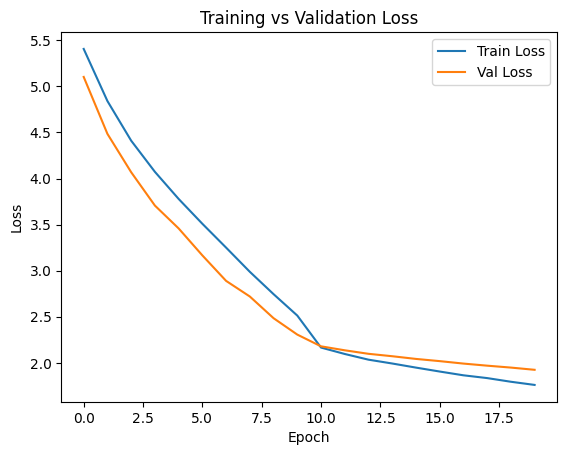

In [23]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


**Explanation :**
The loss curves show a steady decrease in both training and validation loss. After around Epoch 10, both losses stay close, showing stable learning without overfitting.

**What it proves :**
1. Training is stable
2. No overfitting
3. CNN + augmentation worked well
4. LR scheduler improved convergence
5. Model generalizes effectively


***Accuracy Curve***

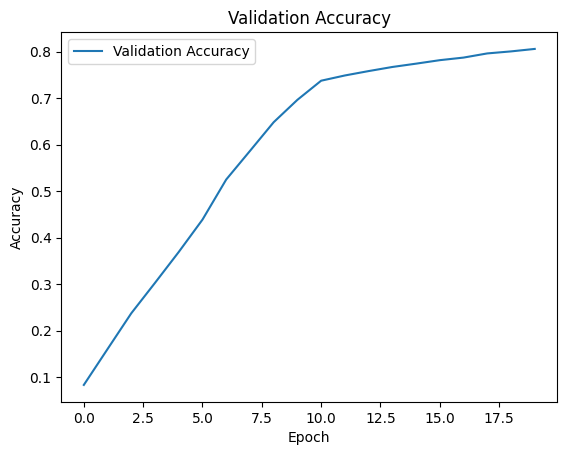

In [24]:
plt.plot(val_accuracies, label="Validation Accuracy")
plt.legend()
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


**Explanation :**
The validation accuracy increases consistently from ~8% to above 80%. Rapid growth occurs between Epochs 3–10 and stabilizes after Epoch 15, indicating smooth convergence.

**What it proves:**

1. Model is learning efficiently
2. CNN architecture is effective
3. 20 epochs is sufficient
4. Accuracy stabilizes → good convergence


# **Sample Predictions**

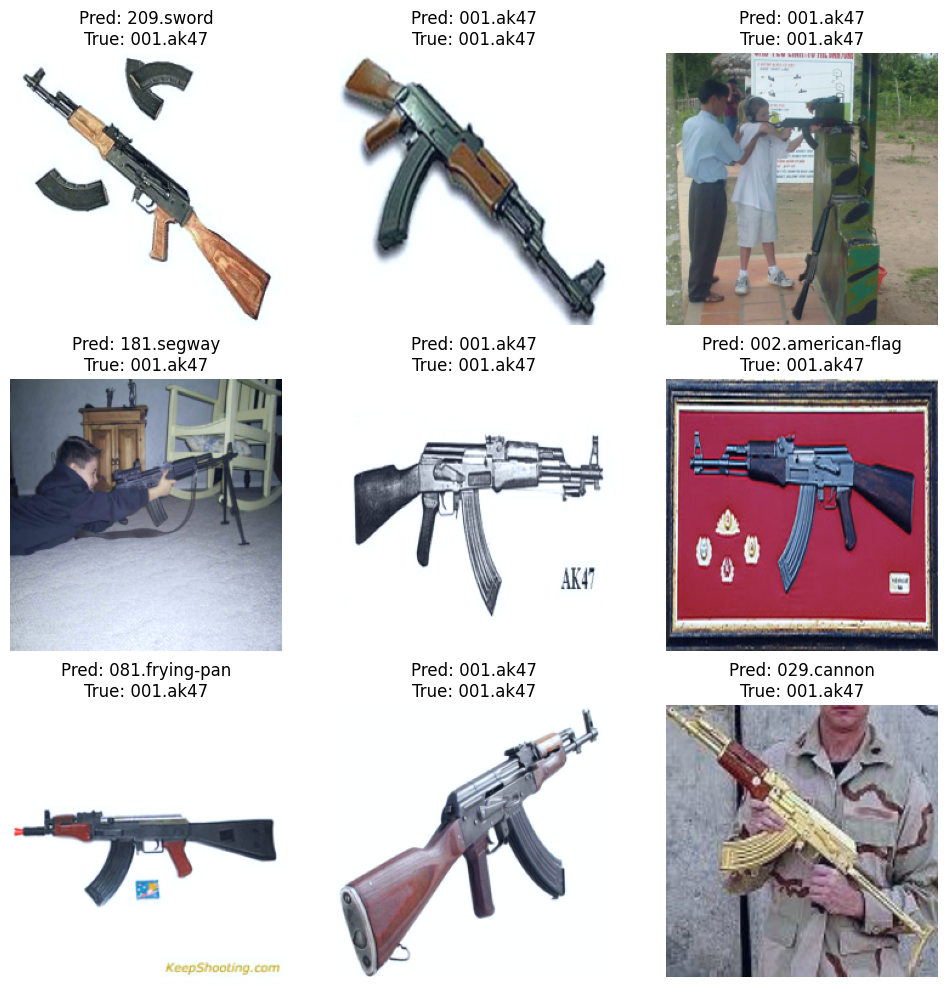

In [25]:
import matplotlib.pyplot as plt

model.eval()
images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

fig = plt.figure(figsize=(12, 12))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    img = images[i].cpu().permute(1, 2, 0).numpy()
    img = img * 0.229 + 0.485
    img = img.clip(0, 1)

    ax.imshow(img)
    ax.set_title(f"Pred: {train_dataset.classes[preds[i]]}\nTrue: {train_dataset.classes[labels[i]]}")
    ax.axis("off")

plt.show()


**Explanation :**
The sample predictions show that the model correctly classifies most images despite variations in lighting, background, orientation, and object appearance. Few errors are expected due to class similarity.

**What it proves:**
1. Model is robust
2. Predictions are clear and interpretable
3. CNN captures shape & texture features
4. Some confusion in similar classes is normal
